In [92]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\Nidhi\Downloads\data.csv")
df

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,RISING costs have forced packaging producer Hu...,negative
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral
5840,"In the building and home improvement trade , s...",neutral


In [3]:
df.shape

(5842, 2)

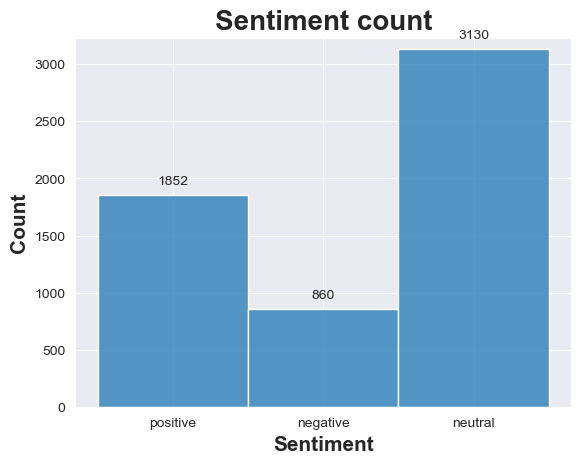

In [4]:
sns.set_style("darkgrid")
ax=sns.histplot(data = df,x="Sentiment")

for p in ax.patches:
    ax.annotate(format(p.get_height(),'.0f'),(p.get_x()+p.get_width()/2,p.get_height()),
                ha='center',va='center',xytext=(0,10),textcoords='offset points')


ax.set_ylim(0,max(df['Sentiment'].value_counts())+100)
plt.title('Sentiment count',fontsize=20,fontweight='bold')
plt.xlabel('Sentiment',fontsize=15,fontweight='bold')
plt.ylabel('Count',fontsize=15,fontweight='bold')
plt.show()

In [5]:
df['len'] = list(map(lambda x : len(str(x).split(' ')),df['Sentence']))
df

,Sentence,Sentiment,len
0,The GeoSolutions technology will leverage Bene...,positive,32
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,11
2,"For the last quarter of 2010 , Componenta 's n...",positive,39
3,According to the Finnish-Russian Chamber of Co...,neutral,20
4,The Swedish buyout firm has sold its remaining...,neutral,23
...,...,...,...
5837,RISING costs have forced packaging producer Hu...,negative,17
5838,Nordic Walking was first used as a summer trai...,neutral,14
5839,"According shipping company Viking Line , the E...",neutral,16
5840,"In the building and home improvement trade , s...",neutral,18


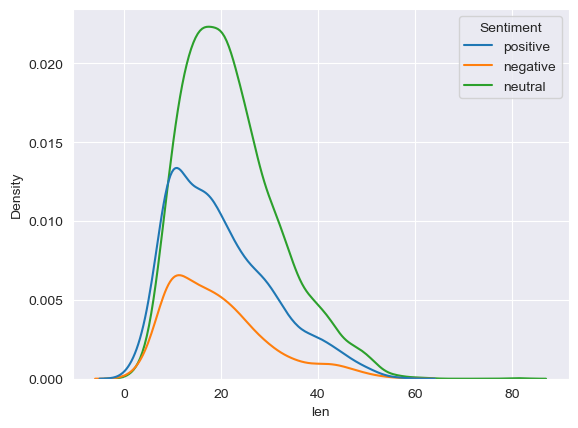

In [6]:
sns.kdeplot(x='len',hue='Sentiment',data=df)
plt.show()

In [7]:
data = df.drop(['Sentiment','len'],axis=1)
data

,Sentence
0,The GeoSolutions technology will leverage Bene...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po..."
2,"For the last quarter of 2010 , Componenta 's n..."
3,According to the Finnish-Russian Chamber of Co...
4,The Swedish buyout firm has sold its remaining...
...,...
5837,RISING costs have forced packaging producer Hu...
5838,Nordic Walking was first used as a summer trai...
5839,"According shipping company Viking Line , the E..."
5840,"In the building and home improvement trade , s..."


In [8]:
def clean(text):
    text = re.sub('[^A-Za-z]+',' ',text)
    return text

data['Clean_sentence'] =  data['Sentence'].apply(clean)
data.head()

,Sentence,Clean_sentence
0,The GeoSolutions technology will leverage Bene...,The GeoSolutions technology will leverage Bene...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",ESI on lows down to BK a real possibility
2,"For the last quarter of 2010 , Componenta 's n...",For the last quarter of Componenta s net sales...
3,According to the Finnish-Russian Chamber of Co...,According to the Finnish Russian Chamber of Co...
4,The Swedish buyout firm has sold its remaining...,The Swedish buyout firm has sold its remaining...


In [9]:
import nltk

In [10]:
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet

In [11]:
pos_dict = {'J':wordnet.ADJ,'V':wordnet.VERB,'N':wordnet.NOUN,'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

In [12]:
data['POS tagged'] = data['Clean_sentence'].apply(token_stop_pos)
data.head()

,Sentence,Clean_sentence,POS tagged
0,The GeoSolutions technology will leverage Bene...,The GeoSolutions technology will leverage Bene...,"[(GeoSolutions, n), (technology, n), (leverage..."
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",ESI on lows down to BK a real possibility,"[(ESI, n), (lows, n), (BK, v), (real, a), (pos..."
2,"For the last quarter of 2010 , Componenta 's n...",For the last quarter of Componenta s net sales...,"[(last, a), (quarter, n), (Componenta, n), (ne..."
3,According to the Finnish-Russian Chamber of Co...,According to the Finnish Russian Chamber of Co...,"[(According, v), (Finnish, a), (Russian, a), (..."
4,The Swedish buyout firm has sold its remaining...,The Swedish buyout firm has sold its remaining...,"[(Swedish, a), (buyout, n), (firm, n), (sold, ..."


In [16]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos: 
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:  
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

data['Lemma'] = data['POS tagged'].apply(lemmatize)
data.head()

,Sentence,Clean_sentence,POS tagged,Lemma
0,The GeoSolutions technology will leverage Bene...,The GeoSolutions technology will leverage Bene...,"[(GeoSolutions, n), (technology, n), (leverage...",GeoSolutions technology leverage Benefon GPS...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",ESI on lows down to BK a real possibility,"[(ESI, n), (lows, n), (BK, v), (real, a), (pos...",ESI low BK real possibility
2,"For the last quarter of 2010 , Componenta 's n...",For the last quarter of Componenta s net sales...,"[(last, a), (quarter, n), (Componenta, n), (ne...",last quarter Componenta net sale double EUR ...
3,According to the Finnish-Russian Chamber of Co...,According to the Finnish Russian Chamber of Co...,"[(According, v), (Finnish, a), (Russian, a), (...",According Finnish Russian Chamber Commerce m...
4,The Swedish buyout firm has sold its remaining...,The Swedish buyout firm has sold its remaining...,"[(Swedish, a), (buyout, n), (firm, n), (sold, ...",Swedish buyout firm sell remain percent stak...


In [17]:
data[['Sentence','Lemma']]

,Sentence,Lemma
0,The GeoSolutions technology will leverage Bene...,GeoSolutions technology leverage Benefon GPS...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",ESI low BK real possibility
2,"For the last quarter of 2010 , Componenta 's n...",last quarter Componenta net sale double EUR ...
3,According to the Finnish-Russian Chamber of Co...,According Finnish Russian Chamber Commerce m...
4,The Swedish buyout firm has sold its remaining...,Swedish buyout firm sell remain percent stak...
...,...,...
5837,RISING costs have forced packaging producer Hu...,RISING cost force packaging producer Huhtama...
5838,Nordic Walking was first used as a summer trai...,Nordic Walking first use summer training met...
5839,"According shipping company Viking Line , the E...",According ship company Viking Line EU decisi...
5840,"In the building and home improvement trade , s...",building home improvement trade sale decreas...


In [23]:
sen = data['Lemma'].tolist()
sen

['  GeoSolutions technology leverage Benefon GPS solution provide Location Based Search Technology Communities Platform location relevant multimedia content new powerful commercial model',
 '  ESI low BK real possibility',
 '  last quarter Componenta net sale double EUR EUR period year earlier move zero pre tax profit pre tax loss EUR',
 '  According Finnish Russian Chamber Commerce major construction company Finland operate Russia',
 '  Swedish buyout firm sell remain percent stake almost eighteen month take company public Finland',
 '  SPY surprise see green close',
 '  Shell Billion BG Deal Meets Shareholder Skepticism',
 '  SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANGE RELEASE OCTOBER PM Company update full year outlook estimate result remain loss full year',
 '  Kone net sale rise year year first nine month',
 '  Stockmann department store total floor space square metre Stockmann investment project price tag EUR million',
 '  Circulation revenue increase Finland Sweden',
 '  SAP

In [26]:
sen_to_string = " ".join(sen)

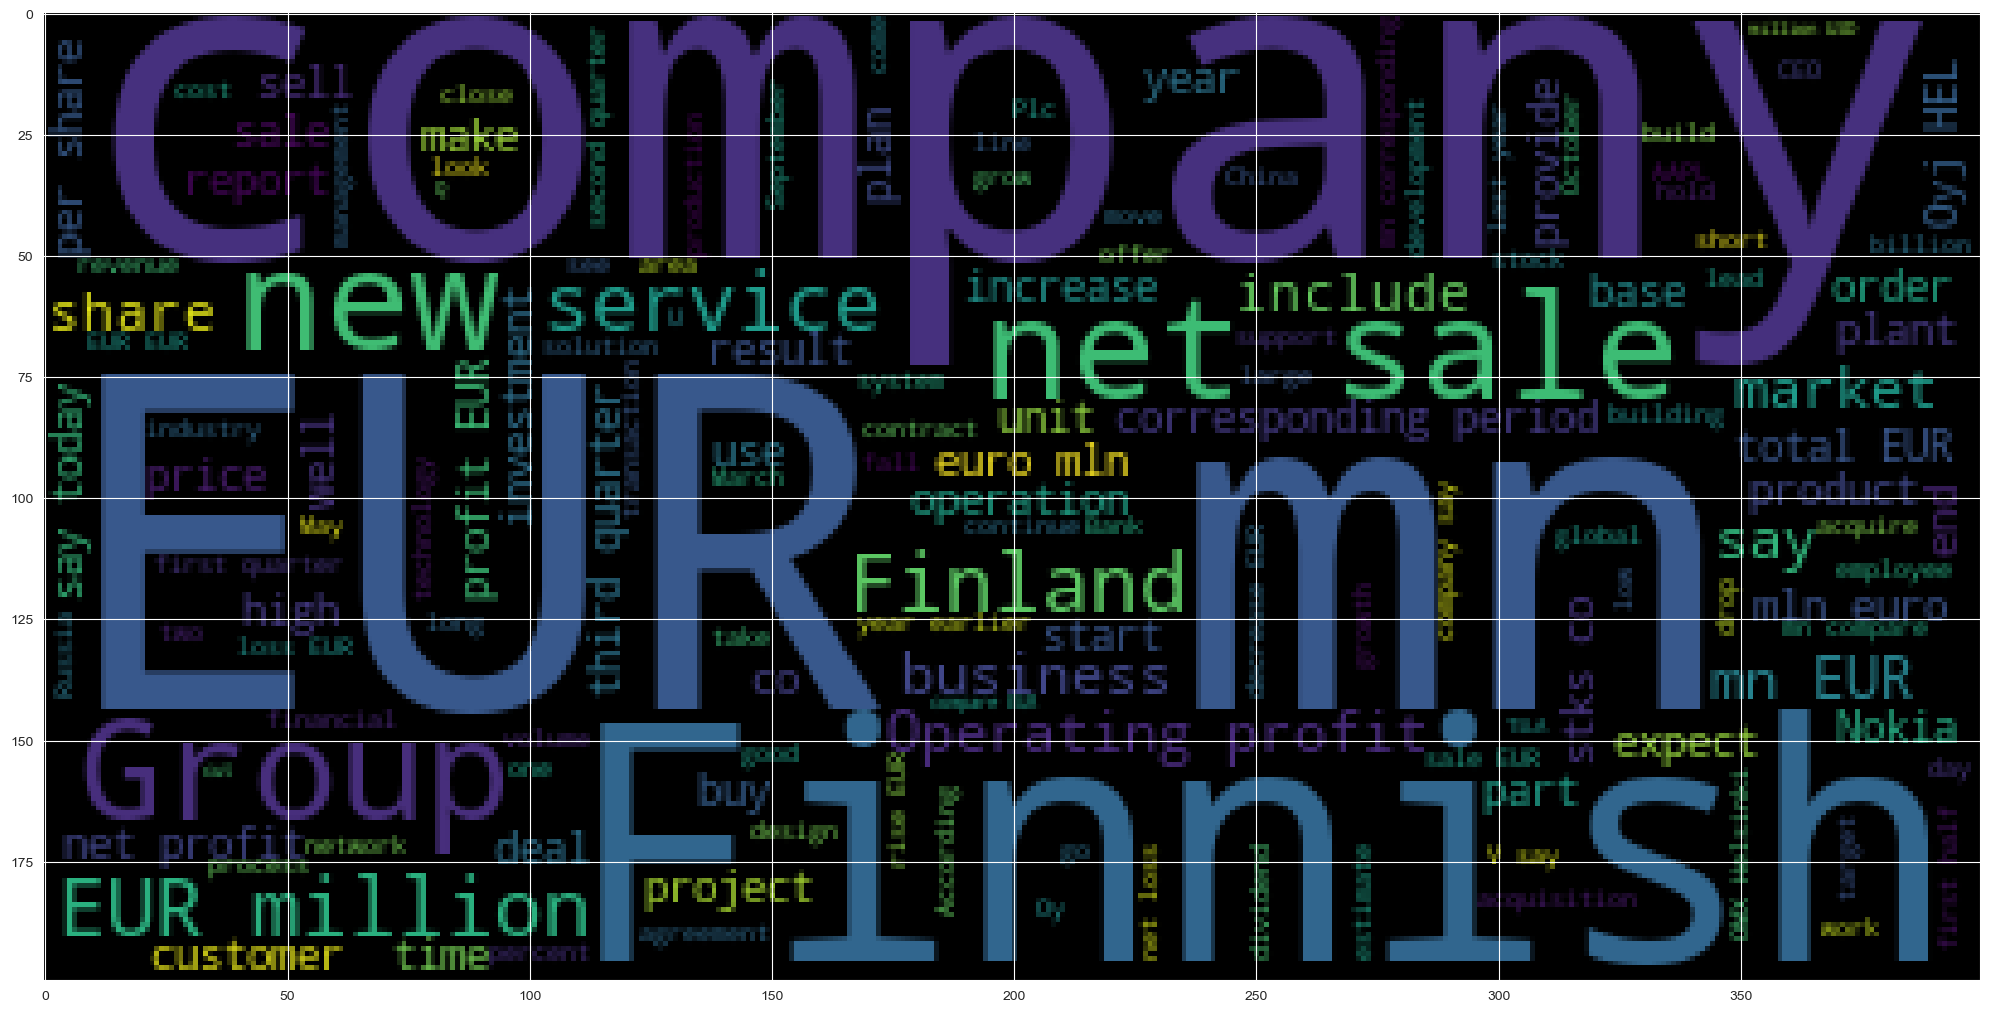

In [39]:
from wordcloud import WordCloud

plt.figure(figsize=(25,25))
plt.imshow(WordCloud().generate(sen_to_string))

In [41]:
!pip install -U textblob

  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   - ------------------------------------- 30.7/626.3 kB 640.0 kB/s eta 0:00:01
   ------------------------------------- -- 593.9/626.3 kB 7.5 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 6.6 MB/s eta 0:00:00


In [42]:
from textblob import TextBlob

In [43]:
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity

def getPolarity(review):
    return TextBlob(review).sentiment.polarity

def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [45]:
fin_data = pd.DataFrame(data[['Sentence', 'Lemma']])

fin_data['Polarity'] = fin_data['Lemma'].apply(getPolarity) 
fin_data['Analysis'] = fin_data['Polarity'].apply(analysis)
fin_data.head()

,Sentence,Lemma,Polarity,Analysis
0,The GeoSolutions technology will leverage Bene...,GeoSolutions technology leverage Benefon GPS...,0.209091,Positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",ESI low BK real possibility,0.100000,Positive
2,"For the last quarter of 2010 , Componenta 's n...",last quarter Componenta net sale double EUR ...,0.000000,Neutral
3,According to the Finnish-Russian Chamber of Co...,According Finnish Russian Chamber Commerce m...,0.031250,Positive
4,The Swedish buyout firm has sold its remaining...,Swedish buyout firm sell remain percent stak...,-0.100000,Negative


In [48]:
count = fin_data.Analysis.value_counts()
count

Neutral     3192
Positive    1793
Negative     857
Name: Analysis, dtype: int64

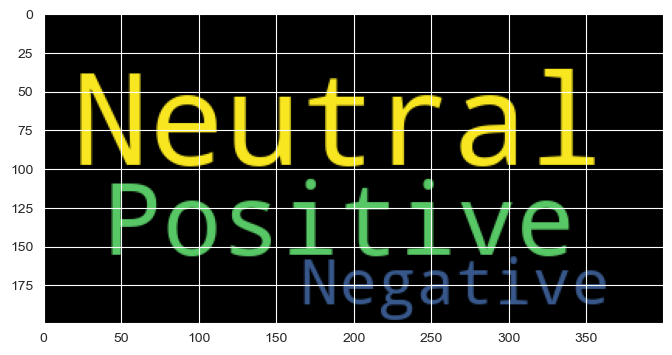

In [114]:
lis = fin_data['Analysis'].tolist()
lis_to_string = " ".join(lis)

plt.figure(figsize=(8,10))
plt.imshow(WordCloud().generate(lis_to_string))

([<matplotlib.patches.Wedge at 0x1f44e577f10>,
 [Text(-0.1597393120058243, 1.088339722788756, 'Neutral'),
  Text(-0.3409313050753043, -1.045832608604097, 'Positive'),
  Text(1.209154850360607, -0.600370342246699, 'Negative')],
 [Text(-0.08713053382135871, 0.5936398487938668, '54.6%'),
  Text(-0.18596253004107505, -0.5704541501476892, '30.7%'),
  Text(0.7613197205974191, -0.378010956229403, '14.7%')])

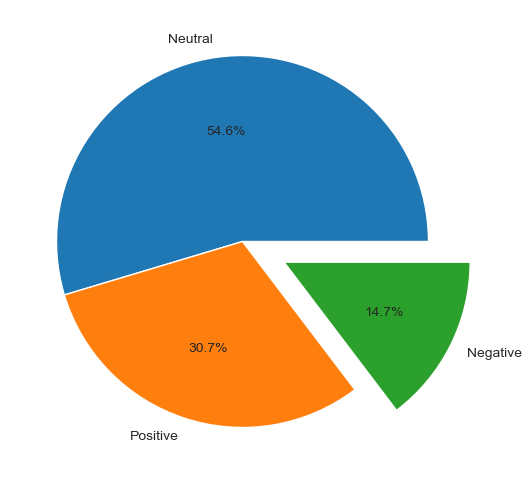

In [75]:
%matplotlib inline

count = fin_data.Analysis.value_counts()
plt.figure(figsize=(6,7))
plt.pie(count.values, labels = count.index ,explode = (0,0,0.25), autopct='%1.1f%%', shadow=False)

In [76]:
!pip install vaderSentiment

     ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
     --------- --------------------------- 30.7/126.0 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 126.0/126.0 kB 1.9 MB/s eta 0:00:00


In [81]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [83]:
def vadersentimentanalysis(review):
    vs = sia.polarity_scores(review)
    return vs ['compound']

fin_data['vader sentiment'] = fin_data['Lemma'].apply(vadersentimentanalysis)

In [86]:
def vader(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5:
        return 'Negative'
    else:
        return 'Neutral'
    
fin_data['vader_analysis'] = fin_data['vader sentiment'].apply(vader)
fin_data.head()

,Sentence,Lemma,Polarity,Analysis,vader sentiment,vader_analysis
0,The GeoSolutions technology will leverage Bene...,GeoSolutions technology leverage Benefon GPS...,0.209091,Positive,0.6249,Positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",ESI low BK real possibility,0.100000,Positive,-0.2732,Neutral
2,"For the last quarter of 2010 , Componenta 's n...",last quarter Componenta net sale double EUR ...,0.000000,Neutral,0.1531,Neutral
3,According to the Finnish-Russian Chamber of Co...,According Finnish Russian Chamber Commerce m...,0.031250,Positive,0.0000,Neutral
4,The Swedish buyout firm has sold its remaining...,Swedish buyout firm sell remain percent stak...,-0.100000,Negative,0.0000,Neutral


In [88]:
vad_counts = fin_data['vader_analysis'].value_counts()
vad_counts

Neutral     4740
Positive     931
Negative     171
Name: vader_analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x1f457248d10>,
 [Text(-0.9953820213014273, 0.6702347586255769, 'Neutral'),
  Text(0.8521613247438506, -0.6955724812058092, 'Positive'),
  Text(1.0953524252263758, -0.10101022003093195, 'Negative')],
 [Text(-0.5806395124258326, 0.39097027586491984, '81.1%'),
  Text(0.46481526804210027, -0.379403171566805, '15.9%'),
  Text(0.5974649592143867, -0.0550964836532356, '2.9%')])

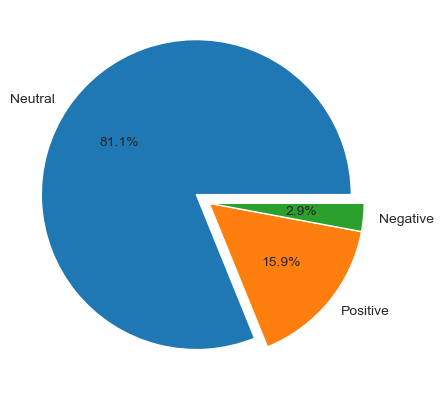

In [90]:
vader_counts= fin_data['vader_analysis'].value_counts()
plt.figure(figsize=(5, 7))
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0.1, 0, 0), autopct='%1.1f%%', shadow=False)

In [94]:
#nltk.download('sentiwordnet')
from nltk.corpus import sentiwordnet as swn

def sentiwordnetanalysis(pos_data):
    sentiment = 0
    tokens_count = 0
    for word, pos in pos_data:
        if not pos:
            continue
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        if not lemma:
            continue
        
        synsets = wordnet.synsets(lemma, pos=pos)
        if not synsets:
            continue

        synset = synsets[0]
        swn_synset = swn.senti_synset(synset.name())
        sentiment += swn_synset.pos_score() - swn_synset.neg_score()
        tokens_count += 1
    
    if sentiment>0:
        return "Positive"
    if sentiment==0:
        return "Neutral"
    else:
        return "Negative"

fin_data['SWN analysis'] = data['POS tagged'].apply(sentiwordnetanalysis)
fin_data.head()

,Sentence,Lemma,Polarity,Analysis,vader sentiment,vader_analysis,SWN analysis
0,The GeoSolutions technology will leverage Bene...,GeoSolutions technology leverage Benefon GPS...,0.209091,Positive,0.6249,Positive,Positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",ESI low BK real possibility,0.100000,Positive,-0.2732,Neutral,Neutral
2,"For the last quarter of 2010 , Componenta 's n...",last quarter Componenta net sale double EUR ...,0.000000,Neutral,0.1531,Neutral,Negative
3,According to the Finnish-Russian Chamber of Co...,According Finnish Russian Chamber Commerce m...,0.031250,Positive,0.0000,Neutral,Positive
4,The Swedish buyout firm has sold its remaining...,Swedish buyout firm sell remain percent stak...,-0.100000,Negative,0.0000,Neutral,Neutral


In [95]:
swn_counts= fin_data['SWN analysis'].value_counts()
swn_counts

Positive    2443
Neutral     1937
Negative    1462
Name: SWN analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x1f455099850>,
 [Text(0.3050733432491447, 1.1605732442369976, 'Positive'),
  Text(-0.9504515503040765, -0.5537525173979599, 'Neutral'),
  Text(0.7771898230571263, -0.7784445895093838, 'Negative')],
 [Text(0.17795945022866774, 0.6770010591382486, '41.8%'),
  Text(-0.518428118347678, -0.30204682767161445, '33.2%'),
  Text(0.42392172166752334, -0.4246061397323911, '25.0%')])

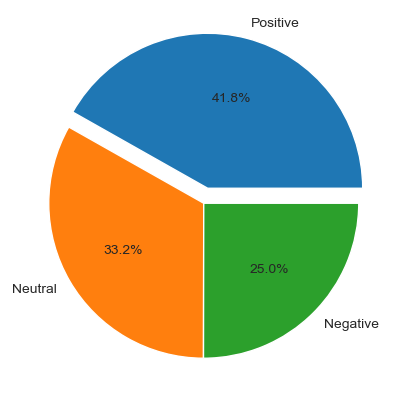

In [96]:
swn_counts= fin_data['SWN analysis'].value_counts()
plt.figure(figsize=(5, 7))
plt.pie(swn_counts.values, labels = swn_counts.index, explode = (0.1, 0, 0), autopct='%1.1f%%', shadow=False)

([<matplotlib.patches.Wedge at 0x1f455291010>,
 [Text(0.27965056464504934, 1.063858807217248, 'Positive'),
  Text(-0.9504515503040765, -0.5537525173979599, 'Neutral'),
  Text(0.9538238737519277, -0.9553638143978801, 'Negative')],
 [Text(0.15253667162457235, 0.5802866221184988, '41.8%'),
  Text(-0.518428118347678, -0.30204682767161445, '33.2%'),
  Text(0.6005557723623247, -0.6015253646208873, '25.0%')])

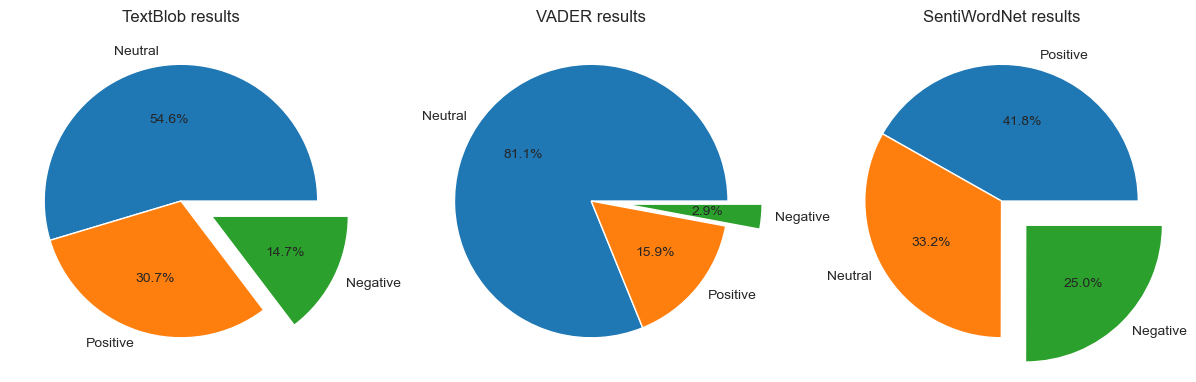

In [99]:
plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.title("TextBlob results")
plt.pie(count.values, labels = count.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,2)
plt.title("VADER results")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,3)
plt.title("SentiWordNet results")
plt.pie(swn_counts.values, labels = swn_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [100]:
result = pd.concat([fin_data,df['Sentiment']],axis=1)
result

,Sentence,Lemma,Polarity,Analysis,vader sentiment,vader_analysis,SWN analysis,Sentiment
0,The GeoSolutions technology will leverage Bene...,GeoSolutions technology leverage Benefon GPS...,0.209091,Positive,0.6249,Positive,Positive,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",ESI low BK real possibility,0.100000,Positive,-0.2732,Neutral,Neutral,negative
2,"For the last quarter of 2010 , Componenta 's n...",last quarter Componenta net sale double EUR ...,0.000000,Neutral,0.1531,Neutral,Negative,positive
3,According to the Finnish-Russian Chamber of Co...,According Finnish Russian Chamber Commerce m...,0.031250,Positive,0.0000,Neutral,Positive,neutral
4,The Swedish buyout firm has sold its remaining...,Swedish buyout firm sell remain percent stak...,-0.100000,Negative,0.0000,Neutral,Neutral,neutral
...,...,...,...,...,...,...,...,...
5837,RISING costs have forced packaging producer Hu...,RISING cost force packaging producer Huhtama...,0.000000,Neutral,-0.1027,Neutral,Positive,negative
5838,Nordic Walking was first used as a summer trai...,Nordic Walking first use summer training met...,0.125000,Positive,0.0000,Neutral,Positive,neutral
5839,"According shipping company Viking Line , the E...",According ship company Viking Line EU decisi...,0.187500,Positive,0.2023,Neutral,Positive,neutral
5840,"In the building and home improvement trade , s...",building home improvement trade sale decreas...,0.000000,Neutral,0.4588,Neutral,Positive,neutral


In [101]:
A=pd.crosstab(result['Sentiment'],result['Analysis'])
A

Analysis,Negative,Neutral,Positive
Sentiment,,,
negative,162,510,188
neutral,468,1737,925
positive,227,945,680


In [103]:
b=np.asarray(A)
sm=sum(b).sum()
dg=np.trace(b)
acc_analysis=(dg/sm)*100
acc_analysis

44.14584046559398

In [105]:
B=pd.crosstab(result['Sentiment'],result['vader_analysis'])
B

vader_analysis,Negative,Neutral,Positive
Sentiment,,,
negative,83,712,65
neutral,62,2711,357
positive,26,1317,509


In [106]:
b=np.asarray(B)
sm=sum(b).sum()
dg=np.trace(b)
acc_analysis1=(dg/sm)*100
acc_analysis1

56.53885655597398

In [107]:
C=pd.crosstab(result['Sentiment'],result['SWN analysis'])
C

SWN analysis,Negative,Neutral,Positive
Sentiment,,,
negative,379,255,226
neutral,698,1093,1339
positive,385,589,878


In [108]:
b=np.asarray(C)
sm=sum(b).sum()
dg=np.trace(b)
acc_analysis2=(dg/sm)*100
acc_analysis2

40.22595001711743